In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

# Iris

In [2]:
iris = pd.read_csv('iris.csv')
X = iris[["sepallength", "petalwidth", "sepalwidth", "petallength"]]
y = iris[["class"]]
cols = ["sepallength", "petalwidth", "sepalwidth", "petallength"]

#fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)
Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)


iris.head()

,sepallength,petalwidth,sepalwidth,petallength,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Support Vector Machine

In [3]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



Decision Tree

In [4]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()


|--- sepalwidth <= 2.45
|   |--- class: Iris-setosa
|--- sepalwidth >  2.45
|   |--- petallength <= 1.75
|   |   |--- sepalwidth <= 5.35
|   |   |   |--- petallength <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petallength >  1.65
|   |   |   |   |--- petalwidth <= 2.75
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- petalwidth >  2.75
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |--- sepalwidth >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- petallength >  1.75
|   |   |--- class: Iris-virginica

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9916666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9333333333333333



In [5]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Random Forest Regression

In [6]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# Waveform

In [7]:
wave = pd.read_csv('wave.csv', sep=',')
X = wave[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']]
y = wave[['class']]
cols = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state=25)
wave.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


Support Vector Machine

In [8]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       329
           1       0.87      0.91      0.89       331
           2       0.90      0.93      0.91       340

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



Decision Tree

In [9]:
#fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)

Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)

decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()

|--- x6 <= 2.56
|   |--- x11 <= 2.69
|   |   |--- x12 <= 3.64
|   |   |   |--- x10 <= 3.59
|   |   |   |   |--- x5 <= 0.20
|   |   |   |   |   |--- x10 <= 1.44
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x10 >  1.44
|   |   |   |   |   |   |--- x9 <= 1.63
|   |   |   |   |   |   |   |--- x13 <= 5.09
|   |   |   |   |   |   |   |   |--- x3 <= -2.15
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- x3 >  -2.15
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- x13 >  5.09
|   |   |   |   |   |   |   |   |--- x16 <= 4.66
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- x16 >  4.66
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x9 >  1.63
|   |   |   |   |   |   |   |--- x0 <= -1.85
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- x0 >  -1.85
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |

In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       329
           1       0.74      0.75      0.74       331
           2       0.78      0.77      0.77       340

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



Random Forest Regression

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       329
           1       0.83      0.87      0.85       331
           2       0.87      0.91      0.89       340

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



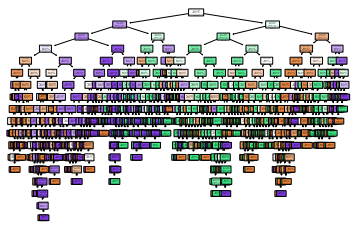

In [11]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))

# Heart

In [12]:
heart = pd.read_csv('heart.csv')
X = heart[["age", "sex", "chest pain type", "resting blood pressure", "serum cholesterol (mg/dl)", "resting blood sugar >120mg/dl","resting electrocariographic results","maximum heart rate received","exercise induced angina", "oldpeak","slopePeak", "numMajorVessels","thal"]]
y = heart[['class']]
cols = ["age", "sex", "chest pain type", "resting blood pressure", "serum cholesterol (mg/dl)", "resting blood sugar >120mg/dl","resting electrocariographic results","maximum heart rate received","exercise induced angina", "oldpeak","slopePeak", "numMajorVessels","thal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)
Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)
heart.head()

,age,sex,chest pain type,resting blood pressure,serum cholesterol (mg/dl),resting blood sugar >120mg/dl,resting electrocariographic results,maximum heart rate received,exercise induced angina,oldpeak,slopePeak,numMajorVessels,thal,class
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


Support Vector Machine

In [13]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
metrics.accuracy_score(y_test,y_pred = pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.72      0.85      0.78        27
           2       0.82      0.67      0.73        27

    accuracy                           0.76        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



Decision Tree

In [14]:
#fitting
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()

|--- thal <= 4.50
|   |--- chest pain type <= 3.50
|   |   |--- oldpeak <= 2.50
|   |   |   |--- serum cholesterol (mg/dl) <= 154.50
|   |   |   |   |--- class: 2
|   |   |   |--- serum cholesterol (mg/dl) >  154.50
|   |   |   |   |--- serum cholesterol (mg/dl) <= 330.00
|   |   |   |   |   |--- resting blood pressure <= 109.00
|   |   |   |   |   |   |--- resting blood pressure <= 106.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- resting blood pressure >  106.50
|   |   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- resting blood pressure >  109.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- serum cholesterol (mg/dl) >  330.00
|   |   |   |   |   |--- numMajorVessels <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- numMajorVessels >  0.50
|   |   |   |   |   |   |--- cla

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.73      0.81      0.77        27
           2       0.79      0.70      0.75        27

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



Random Forest Regression

              precision    recall  f1-score   support

           1       0.74      0.85      0.79        27
           2       0.83      0.70      0.76        27

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



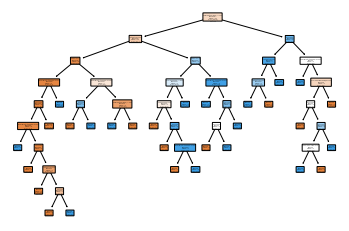

In [16]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))

# Breast Cancer

In [17]:
breastCancer = pd.read_csv ('breastCancer.csv')
cols = ["age", "menopause", "tumor-size", "inv-nodes", "node-caps","deg-malig","breast","breast-quad","irradiat"]
X=breastCancer[["menopause", "age", "tumor-size", "inv-nodes", "node-caps","deg-malig","breast","breast-quad","irradiat"]]
#encoding the normal data
for col in ["menopause","node-caps","breast","breast-quad","irradiat"]:
    X[col] = LabelEncoder().fit_transform(X[col])
#encoding the ordinal data #Ordinal Encoder not working so i just hardcoded first
ordinalData = ["age","tumor-size","inv-nodes"]
for i in ordinalData:
    columns = X[i].unique()
    columns.sort() #sorting the labels
    for j in range(len(columns)):
        X.loc[X[i]==columns[j],i] = j
y=breastCancer[["class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)
Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)
breastCancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


Support Vector Machine

In [18]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)

metrics.accuracy_score(y_test,y_pred = pred)
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

no-recurrence-events       0.77      0.88      0.82        41
   recurrence-events       0.50      0.31      0.38        16

            accuracy                           0.72        57
           macro avg       0.63      0.60      0.60        57
        weighted avg       0.69      0.72      0.70        57



Decision Tree

In [19]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()

|--- deg-malig <= 2.50
|   |--- tumor-size <= 1.50
|   |   |--- class: no-recurrence-events
|   |--- tumor-size >  1.50
|   |   |--- tumor-size <= 6.50
|   |   |   |--- deg-malig <= 1.50
|   |   |   |   |--- node-caps <= 0.50
|   |   |   |   |   |--- menopause <= 3.50
|   |   |   |   |   |   |--- class: recurrence-events
|   |   |   |   |   |--- menopause >  3.50
|   |   |   |   |   |   |--- class: no-recurrence-events
|   |   |   |   |--- node-caps >  0.50
|   |   |   |   |   |--- menopause <= 1.50
|   |   |   |   |   |   |--- breast <= 0.50
|   |   |   |   |   |   |   |--- class: no-recurrence-events
|   |   |   |   |   |   |--- breast >  0.50
|   |   |   |   |   |   |   |--- class: recurrence-events
|   |   |   |   |   |--- menopause >  1.50
|   |   |   |   |   |   |--- class: no-recurrence-events
|   |   |   |--- deg-malig >  1.50
|   |   |   |   |--- inv-nodes <= 2.00
|   |   |   |   |   |--- breast-quad <= 3.50
|   |   |   |   |   |   |--- menopause <= 3.50
|   |   |   |   |   | 

In [20]:
print(classification_report(y_test, y_test_pred))

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.80      0.80        41
   recurrence-events       0.47      0.44      0.45        16

            accuracy                           0.70        57
           macro avg       0.63      0.62      0.62        57
        weighted avg       0.70      0.70      0.70        57



Random Forest Regression

                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.85      0.81        41
   recurrence-events       0.50      0.38      0.43        16

            accuracy                           0.72        57
           macro avg       0.64      0.61      0.62        57
        weighted avg       0.70      0.72      0.71        57



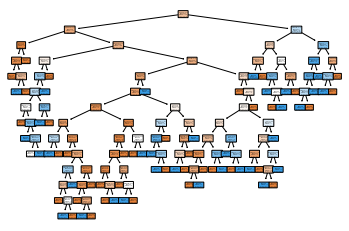

In [21]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))

# German

In [22]:
german = pd.read_csv ('german.csv')
X=german[["checkAccStatus", "durationMth", "credHist", "purpose", "credAmt","savAccBond","emplySince","instRate","personalStatSex","otherDebtGuar","presResSince","prpty","age(years)","otherInstallPlans","housing","numExistCreds","job","numPplMaintain","telephone","frgnWorker"]]
for col in ['checkAccStatus','credHist','purpose','savAccBond','emplySince','personalStatSex','otherDebtGuar','prpty','otherInstallPlans','housing','job','telephone','frgnWorker']:
    X[col] = LabelEncoder().fit_transform(X[col])
y=german[["goodBad"]]

#fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)
Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)
cols = ["checkAccStatus", "durationMth", "credHist", "purpose", "credAmt","savAccBond","emplySince","instRate","personalStatSex","otherDebtGuar","presResSince","prpty","age(years)","otherInstallPlans","housing","numExistCreds","job","numPplMaintain","telephone","frgnWorker"]
german.head()

,checkAccStatus,durationMth,credHist,purpose,credAmt,savAccBond,emplySince,instRate,personalStatSex,otherDebtGuar,...,prpty,age(years),otherInstallPlans,housing,numExistCreds,job,numPplMaintain,telephone,frgnWorker,goodBad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Support Vector Machine

In [23]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
metrics.accuracy_score(y_test,y_pred = pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83       140
           2       0.61      0.32      0.42        60

    accuracy                           0.73       200
   macro avg       0.69      0.62      0.62       200
weighted avg       0.71      0.73      0.71       200



Decision Tree

In [24]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()

|--- checkAccStatus <= 1.50
|   |--- durationMth <= 22.50
|   |   |--- credHist <= 1.50
|   |   |   |--- personalStatSex <= 2.50
|   |   |   |   |--- purpose <= 7.50
|   |   |   |   |   |--- age(years) <= 23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age(years) >  23.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- purpose >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- personalStatSex >  2.50
|   |   |   |   |--- class: 1
|   |   |--- credHist >  1.50
|   |   |   |--- credAmt <= 1373.00
|   |   |   |   |--- prpty <= 1.50
|   |   |   |   |   |--- durationMth <= 11.00
|   |   |   |   |   |   |--- emplySince <= 2.50
|   |   |   |   |   |   |   |--- job <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- job >  1.50
|   |   |   |   |   |   |   |   |--- presResSince <= 3.50
|   |   |   |   |   |   |   |   |   |--- durationMth <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   | 

In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.78      0.81      0.79       140
           2       0.51      0.47      0.49        60

    accuracy                           0.70       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.70      0.70      0.70       200



Random Forest Regression

              precision    recall  f1-score   support

           1       0.79      0.97      0.87       140
           2       0.86      0.40      0.55        60

    accuracy                           0.80       200
   macro avg       0.82      0.69      0.71       200
weighted avg       0.81      0.80      0.77       200



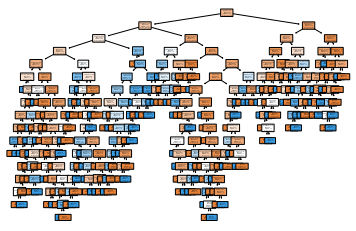

In [26]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))

# University Student Placement

In [27]:
campusPlacement = pd.read_csv ('Placement_data_Full_Class.csv')
campusPlacement = campusPlacement.drop(['salary'],1)
campusPlacement = campusPlacement.drop(['sl_no'],1)
X = campusPlacement[[ 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]
#creating a function to encode categorical features into numerical
for col in ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']:
    X[col] = LabelEncoder().fit_transform(X[col])
y=campusPlacement[['status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)
Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)

cols = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']#, 'salary']
campusPlacement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Support Vector Machine

In [28]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)

metrics.accuracy_score(y_test,y_pred = pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Not Placed       0.80      0.86      0.83        14
      Placed       0.93      0.90      0.91        29

    accuracy                           0.88        43
   macro avg       0.86      0.88      0.87        43
weighted avg       0.89      0.88      0.88        43



Decision Tree

In [29]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()

|--- ssc_p <= 62.50
|   |--- degree_p <= 64.40
|   |   |--- mba_p <= 57.06
|   |   |   |--- degree_p <= 59.00
|   |   |   |   |--- class: Not Placed
|   |   |   |--- degree_p >  59.00
|   |   |   |   |--- class: Placed
|   |   |--- mba_p >  57.06
|   |   |   |--- class: Not Placed
|   |--- degree_p >  64.40
|   |   |--- ssc_p <= 55.80
|   |   |   |--- degree_p <= 70.65
|   |   |   |   |--- ssc_b <= 0.50
|   |   |   |   |   |--- class: Not Placed
|   |   |   |   |--- ssc_b >  0.50
|   |   |   |   |   |--- hsc_p <= 54.40
|   |   |   |   |   |   |--- class: Not Placed
|   |   |   |   |   |--- hsc_p >  54.40
|   |   |   |   |   |   |--- class: Placed
|   |   |   |--- degree_p >  70.65
|   |   |   |   |--- class: Placed
|   |   |--- ssc_p >  55.80
|   |   |   |--- class: Placed
|--- ssc_p >  62.50
|   |--- ssc_p <= 70.75
|   |   |--- degree_t <= 0.50
|   |   |   |--- degree_p <= 61.20
|   |   |   |   |--- hsc_p <= 61.25
|   |   |   |   |   |--- class: Placed
|   |   |   |   |--- hsc_p >  61

In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

  Not Placed       0.62      0.71      0.67        14
      Placed       0.85      0.79      0.82        29

    accuracy                           0.77        43
   macro avg       0.74      0.75      0.74        43
weighted avg       0.78      0.77      0.77        43



Random Forest Regression

              precision    recall  f1-score   support

  Not Placed       0.75      0.86      0.80        14
      Placed       0.93      0.86      0.89        29

    accuracy                           0.86        43
   macro avg       0.84      0.86      0.85        43
weighted avg       0.87      0.86      0.86        43



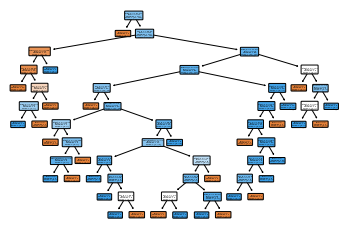

In [31]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True,
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))

# Stroke

In [50]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke = stroke.dropna()
X=stroke[["gender", "age", "heart_disease", "ever_married", "work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]]
#encoding the normal data
for col in ["gender","ever_married","work_type","Residence_type","smoking_status" ]:
    X[col] = LabelEncoder().fit_transform(X[col])
y=stroke[["stroke"]]
cols = ["gender", "age", "heart_disease", "ever_married", "work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state=25)
Xt, Xcv, Yt, Ycv = train_test_split(X_train,y_train, random_state = 25, test_size = 0.2)

stroke.head()






,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Support Vector Machine

In [51]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train,y_train)
pred = cls.predict(X_test)

metrics.accuracy_score(y_test,y_pred = pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



Decision Tree

In [52]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree = decision_tree.fit(Xt,Yt)
r = export_text(decision_tree, feature_names=cols)
print(r)

#prediction
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decision_tree.score(X_test, y_test))
print()

|--- age <= 67.50
|   |--- age <= 48.50
|   |   |--- age <= 37.50
|   |   |   |--- avg_glucose_level <= 57.93
|   |   |   |   |--- avg_glucose_level <= 57.92
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  57.92
|   |   |   |   |   |--- class: 1
|   |   |   |--- avg_glucose_level >  57.93
|   |   |   |   |--- smoking_status <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoking_status >  2.50
|   |   |   |   |   |--- avg_glucose_level <= 76.23
|   |   |   |   |   |   |--- avg_glucose_level <= 75.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- avg_glucose_level >  75.81
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- avg_glucose_level >  76.23
|   |   |   |   |   |   |--- class: 0
|   |   |--- age >  37.50
|   |   |   |--- avg_glucose_level <= 86.97
|   |   |   |   |--- avg_glucose_level <= 86.94
|   |   |   |   |   |--- bmi <= 26.35
|   |   |   |   |   |   |--- bmi <= 26.10
|   |   |   |   |   |   

In [53]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       939
           1       0.05      0.05      0.05        43

    accuracy                           0.92       982
   macro avg       0.50      0.50      0.50       982
weighted avg       0.92      0.92      0.92       982



Random Forest

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



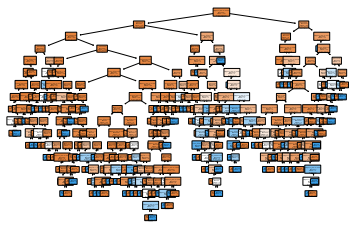

In [54]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, y_train)
plot_tree(rf.estimators_[0], 
          feature_names=cols,
          class_names=cols, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))